
# Tomagraphie électrique : Résistivité apparente et inversion

Profils de résistivité apparente et inversion

Notebook issu de l'[exemple de PyGimli](https://www.pygimli.org/_examples_auto/3_ert/plot_02_ert_field_data.html)

In [1]:
#!conda create -n pg -c gimli -c conda-forge "pygimli>=1.5.0"

In [2]:
import pygimli as pg
from pygimli.physics import ert
from pygimli.viewer.mpl import draw1DColumn
from pygimli.viewer.mpl import drawMesh
from pygimli.frameworks.resolution import resolutionMatrix

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
# définir cette méthode pour choisir quelles données sélectionner (pour lancer tout le notebook d'un coup)
# Méthodes individuelles
method = 'WS' # Wenner-Schlumberger
#method = 'WE' # Wenner
#method = 'DD' # Dipôle-dipôle
# Méthodes combinées
#method = 'WC' # Wenner-Schlumberger et Wenner combinées
#method = 'all' # Les 3 méthodes combinées

In [6]:
# format text res2dinv .dat issu de Prosys après pré-traitement et ajout de la topographie
dataWS = pg.physics.ert.load("data/WS.dat")
dataWE = pg.physics.ert.load("data/WE.dat")
dataDD = pg.physics.ert.load("data/DD.dat")

24/11/24 - 18:01:44 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
24/11/24 - 18:01:44 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
24/11/24 - 18:01:44 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


In [7]:
if method == 'WS':
    data = dataWS
elif method == 'WE':
    data = dataWE
elif method == 'DD':
    data = dataDD
elif method == 'WC':
    dataWS.add(dataWE)
    data = dataWS
elif method == 'all':
    dataWS.add(dataWE)
    dataWS.add(dataDD)
    data = dataWS
else:
    print(f'Bad method : {method}')

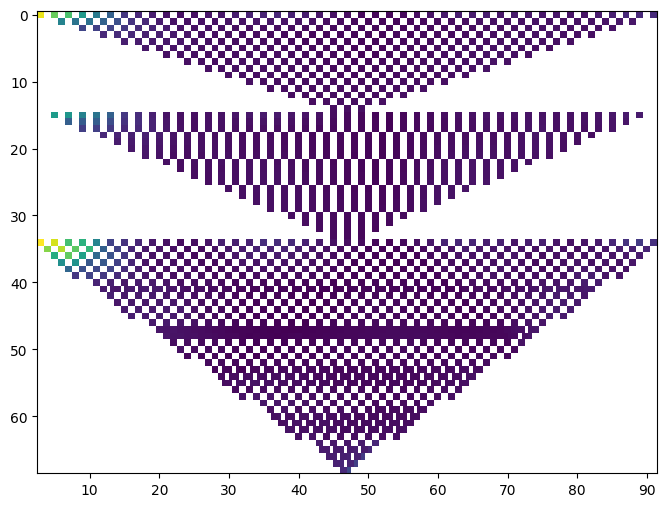

/home/valentin/micromamba/envs/gimli/lib/python3.11/site-packages/pygimli/viewer/mpl/colorbar.py:321: UserWarning: Adding colorbar to a different Figure <Figure size 800x600 with 2 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  cbar = cbarTarget.colorbar(gci, cax=cax, orientation=orientation)


<Figure size 640x480 with 0 Axes>

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax, cb = ert.show(data, ax=ax)
fig.savefig(f'figures/elec_profil_flat_{method}')

In [9]:
# ajouter la topo, elle est dans le fichier mais disjointe des données
topo = data.additionalPoints()
elec = pg.meshtools.tapeMeasureToCoordinates(topo, pg.x(data))
data.setSensorPositions(elec)

24/11/24 - 18:01:45 - pyGIMLi - WARNING - Deprecated code usage at:
24/11/24 - 18:01:46 - pyGIMLi - WARNING - None.<module>(2661096086.py:3)
tapeMeasureToCoordinates interpolateAlongCurve


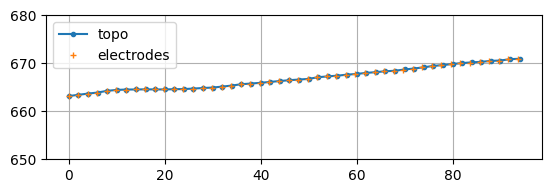

In [10]:
plt.plot(pg.x(topo), pg.y(topo), ".-", label="topo")
plt.plot(pg.x(elec), pg.y(elec), "+", markersize=4, label="electrodes")
plt.grid()
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.ylim(650, 680)
plt.legend()

In [11]:
data['k'] = ert.createGeometricFactors(data, numerical=True) # ajout du champ du facteur géométrique k

24/11/24 - 18:01:46 - pyGIMLi - INFO - Cache /home/valentin/micromamba/envs/gimli/lib/python3.11/site-packages/pygimli/physics/ert/ert.py:createGeometricFactors restored (5.8s x 5): /home/valentin/.cache/pygimli/16821421985419573498


In [12]:
mgr = ert.ERTManager(sr=False) # pour l'inversion

24/11/24 - 18:01:46 - pyGIMLi - INFO - Cache /home/valentin/micromamba/envs/gimli/lib/python3.11/site-packages/pygimli/physics/ert/ert.py:createGeometricFactors restored (0.0s x 5): /home/valentin/.cache/pygimli/12918347123003846087


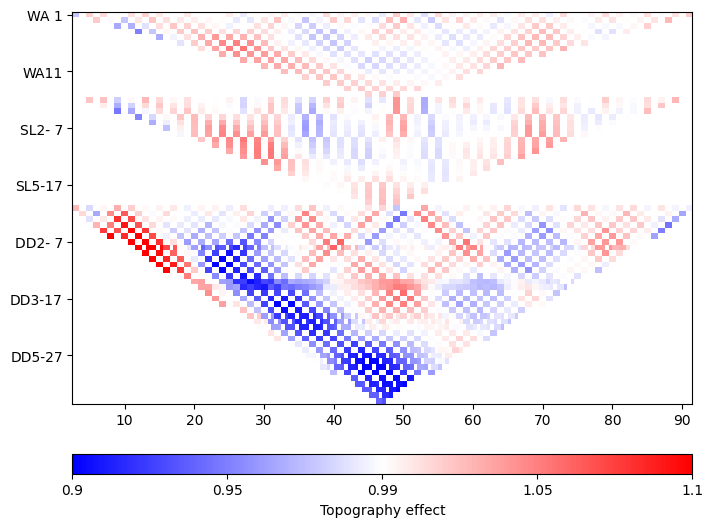

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
k0 = ert.createGeometricFactors(data)
ert.showData(data, ax=ax, vals=k0/data['k'], label='Topography effect', cMap = "bwr", cMin = 0.9, cMax = 1.1, logScale = True) # cMin = 0.98, cMax = 1.02, 
# Les points <1 font référence à une atténuation des courants dû à la topo. Les points >1 font référence à une amplification des signaux.
# D'après notre graph, pas d'effet majeur de la topo.
fig.savefig(f'figures/elec_topo_effect_{method}')

In [14]:
mgr.checkData(data)
print(data)

Data: Sensors: 48 data: 1850, nonzero entries: ['a', 'b', 'k', 'm', 'n', 'rhoa', 'valid']


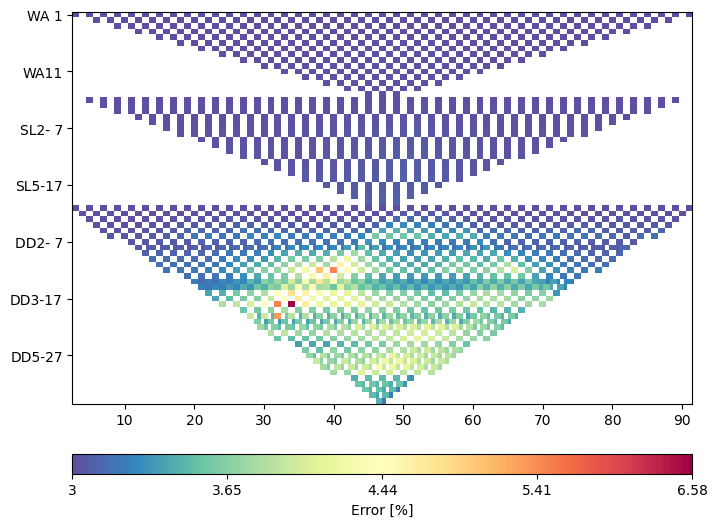

In [15]:
data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)  
# or manually:
# data['err'] = data_errors  # somehow
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ert.show(data, data['err']*100, ax=ax, label="Error [%]", vmin=0, vmax=10)
fig.savefig(f'figures/elec_error_{method}')

24/11/24 - 18:01:49 - pyGIMLi - INFO - Found 2 regions.
24/11/24 - 18:01:49 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/11/24 - 18:01:49 - pyGIMLi - INFO - Found 2 regions.
24/11/24 - 18:01:49 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/11/24 - 18:01:49 - pyGIMLi - INFO - Creating forward mesh from region infos.
24/11/24 - 18:01:49 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/11/24 - 18:01:49 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 4203 Cells: 8016 Boundaries: 6206
24/11/24 - 18:01:50 - pyGIMLi - INFO - Use median(data values)=579.1400000000001
24/11/24 - 18:01:50 - pyGIMLi - INFO - Created startmodel from forward operator: 1269, min/max=579.140000/579.140000
24/11/24 - 18:01:50 - pyGIMLi - INFO - Starting inversion.


Constructing Delaunay triangulation by divide-and-conquer method.
Delaunay milliseconds:  1
Recovering segments in Delaunay triangulation.
Segment milliseconds:  0
Removing unwanted triangles.
Spreading regional attributes and area constraints.
Hole milliseconds:  0
Adding Steiner points to enforce quality.
Quality milliseconds:  2

Writing vertices.
Writing triangles.
Writing segments.
Writing edges.

Output milliseconds:  0
Total running milliseconds:  5

Statistics:

  Input vertices: 150
  Input segments: 151
  Input holes: 0

  Mesh vertices: 1100
  Mesh triangles: 2004
  Mesh edges: 3103
  Mesh exterior boundary edges: 194
  Mesh interior boundary edges: 47
  Mesh subsegments (constrained edges): 241

min/max(dweight) = 15.1959/33.3328
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x7f9e0b9d3ab0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x7f9e03425a30>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x7f9e0b8c7d80>
min/max (data): 8

S(4/4-std::mt): 0.00605571:time: 35.3133s
sens sum: median = 1.27209 min = 0.588772 max = 2.61616
... 35.3626 s
solve CGLSCDWWtrans with lambda = 10
Calculating response for model: min = 57.3146 max = 22781.3
Forward: time: 2.17373s
Response: min = 103.239 max = 14441.7 mean = 791.073
Reciprocity rms(modelReciprocity) 0%, max: 0%
6: LS newModel: min = 57.3146; max = 22781.3
6: LS newResponse: min = 103.239; max = 14441.7
6: rms/rrms(data, LS newResponse) = 91.685/9.07718%
6: chi^2(data, LS newResponse, error, log) = 6.21948
6: Phi = 11506+149.157*10=12997.6
Performing line search with tau = 0.1
Calculating response for model: min = 47.1723 max = 21034.7
Forward: time: 1.62522s
Response: min = 105.208 max = 13580.3 mean = 787.522
Reciprocity rms(modelReciprocity) 0%, max: 0%
6: Model: min = 47.1723; max = 21034.7
6: Response: min = 105.208; max = 13580.3
6: rms/rrms(data, Response) = 109.721/8.98008%
6: chi^2(data, Response, error, log) = 5.07005
6: Phi = 9379.58+144.216*10=10821.7
chi²

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x7f9df1d2f550>)

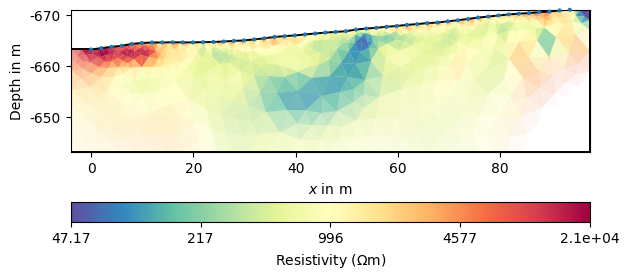

In [16]:
mod = mgr.invert(data, verbose=True, lam=10, paraDX=0.3, paraMaxCellSize=10, paraDepth=20, quality=33.6)  #lam représente la régularisation model=mod, 

mgr.showResult(xlabel="x (m)", ylabel = "z(m)")

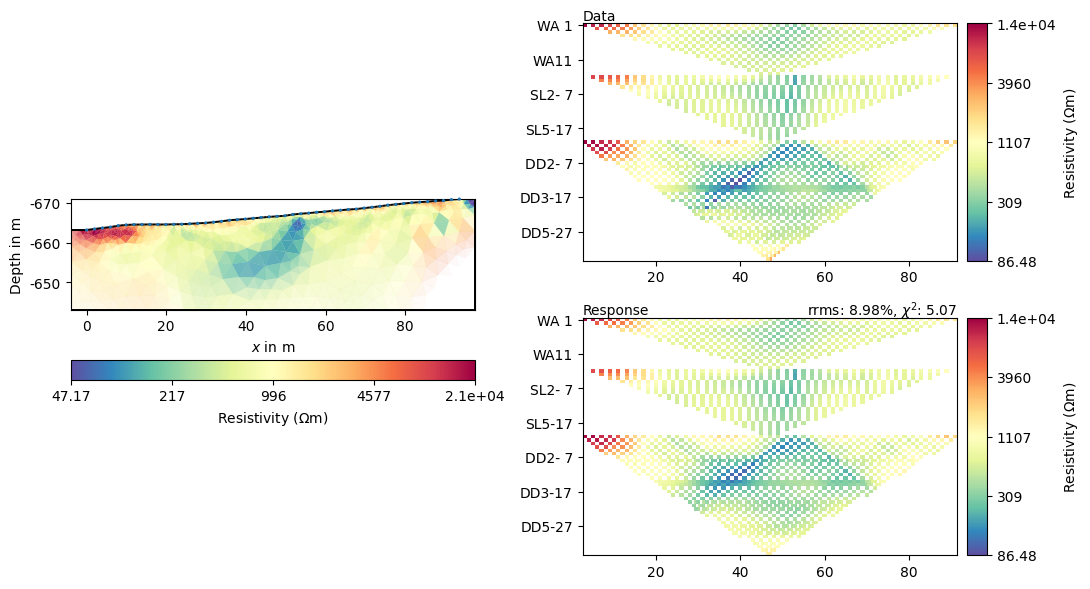

In [17]:
fig = mgr.showResultAndFit()

In [18]:
inv = mgr.createInversionFramework()
RM, RD = resolutionMatrix(inv, returnRD=True)

n = int(np.sqrt(len(RD)))
m = len(RD)//n
d = RD[200].reshape(n, m)

In [19]:
#pixel_plot = plt.imshow(d, cmap='Greens', interpolation='nearest', origin='lower') 

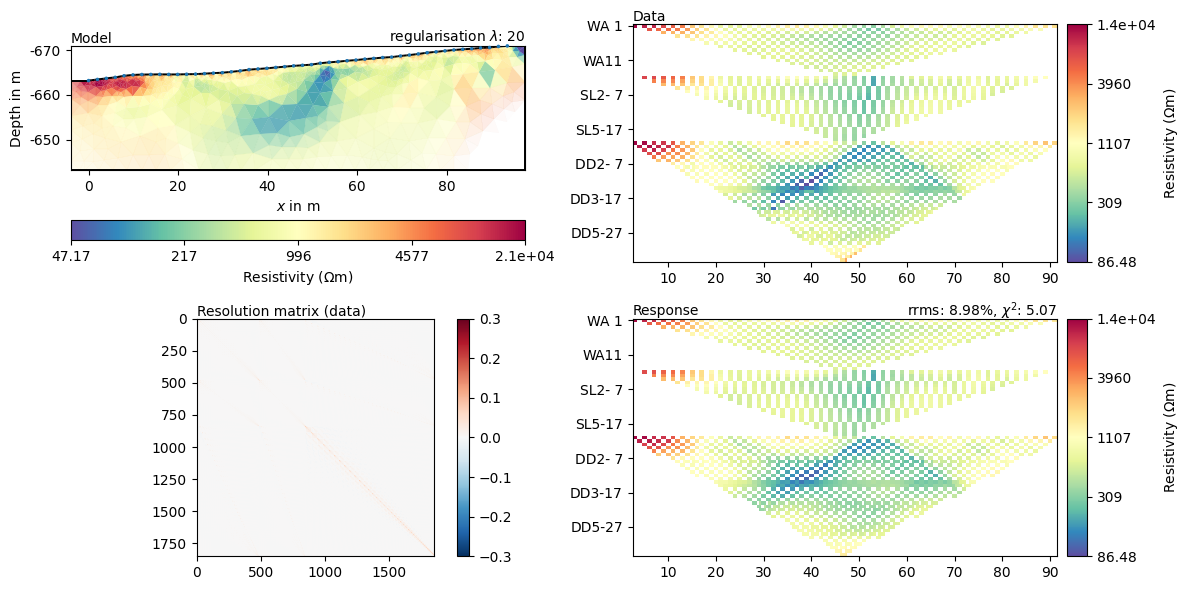

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
mgr.showResultAndFit(axs=(axs[(0, 0)], axs[(0, 1)], axs[(1, 1)]))
ax = axs[(0, 0)]
ax.text(0, 1, 'Model',
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes)
ax.text(1, 1, 'regularisation $\lambda$: 20',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes)
im = axs[(1, 0)].imshow(RD, vmin=-.3, vmax=.3, cmap="RdBu_r") #  vmin=-0.3, vmax=0.3
cb = plt.colorbar(im)
axs[(1, 0)].text(0, 1, 'Resolution matrix (data)',
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=axs[(1, 0)].transAxes)
plt.tight_layout()
fig.savefig(f'figures/elec_inversion_{method}')

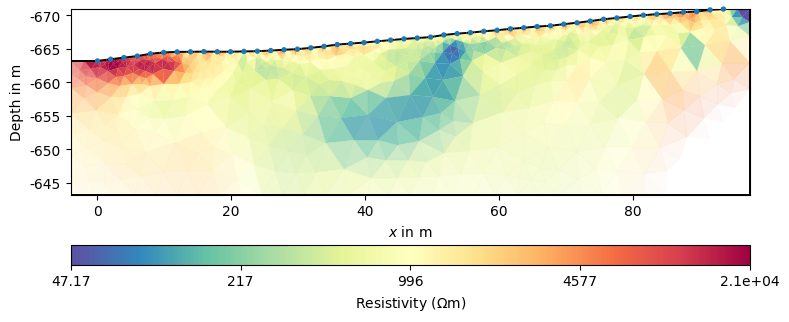

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
mgr.showResult(mod, cMap="Spectral_r", logScale=True, ax=ax) # cMin=130, cMax=23000, 
fig.savefig(f'figures/elec_model_{method}')

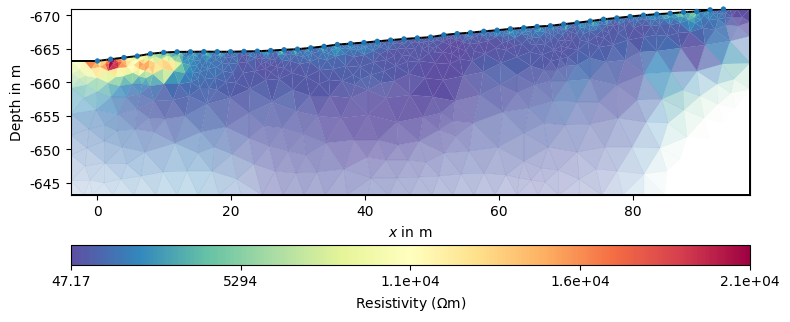

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
mgr.showResult(mod, cMap="Spectral_r", logScale=False, ax=ax) # cMin=130, cMax=23000, 
fig.savefig(f'figures/elec_model_nolog_{method}')

24/11/24 - 18:05:49 - pyGIMLi - INFO - Saving inversion results to: output/all/ERTManager


Additional (topo) points are unhandled and will not be saved.


('output/all/ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

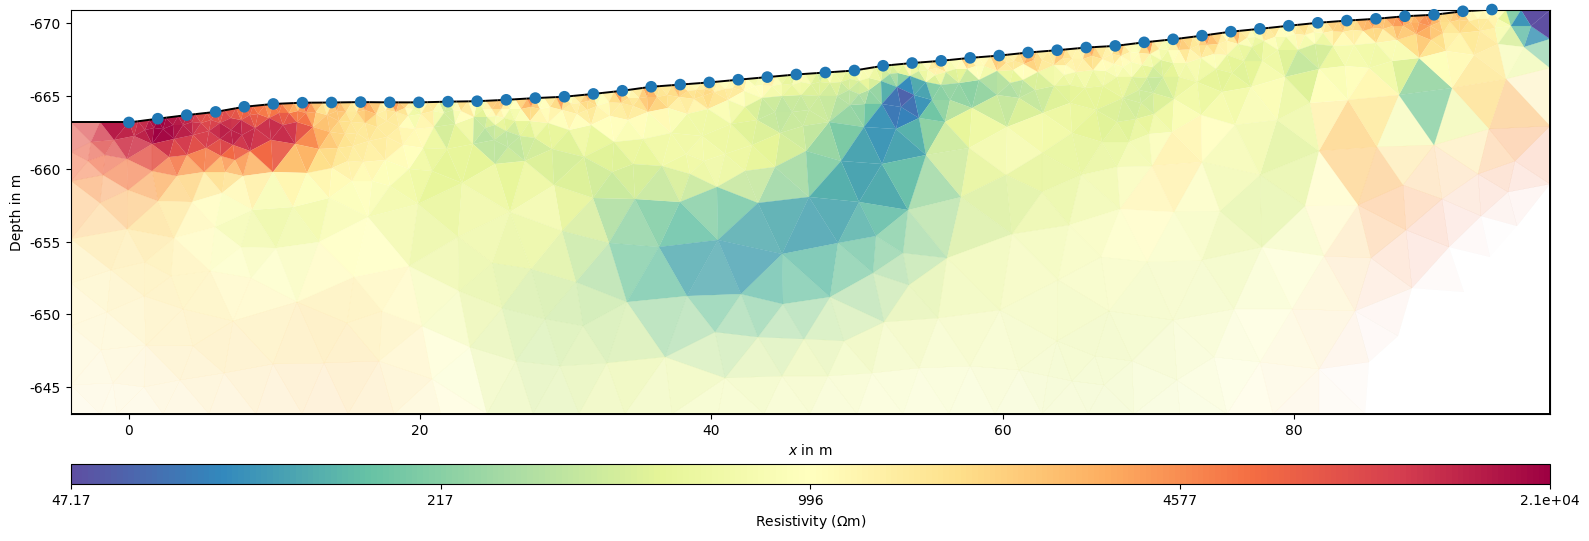

In [23]:
mgr.saveResult(f'output/{method}')